In [67]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt 
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [68]:
train = pd.read_csv('../input/tabular-playground-series-sep-2021/train.csv')
X_test = pd.read_csv('../input/tabular-playground-series-sep-2021/test.csv')

In [69]:
X_train = train.drop(train.columns[-1], axis=1)
y_train = train[train.columns[-1]]

In [70]:
print((train['claim'] == 0).sum(), '|', (train['claim'] == 1).sum())

480404 | 477515


<AxesSubplot:>

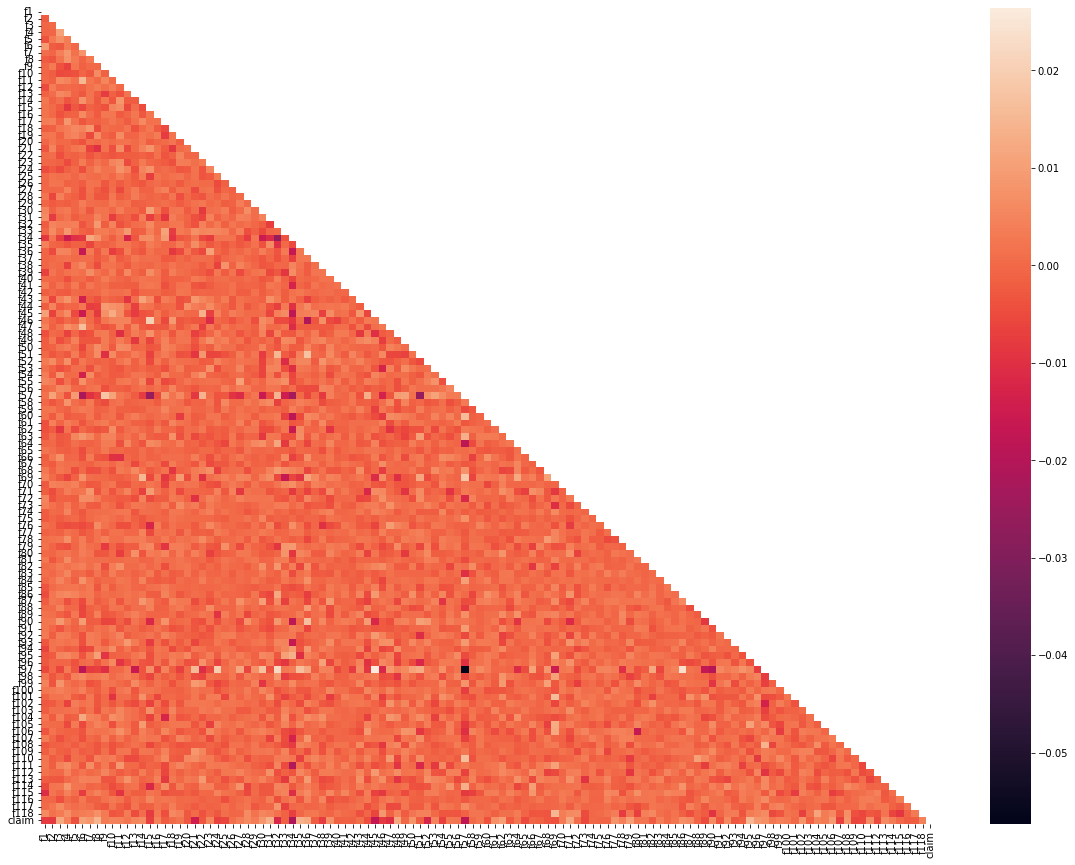

In [71]:
# correlation check
corr = train.iloc[:,1:].corr()

plt.figure(figsize=(20,15))
mask = np.triu(np.ones_like(corr, dtype=bool)) # upper triangle of an array
sns.heatmap(corr,mask=mask,xticklabels=corr.columns,yticklabels=corr.columns)

In [72]:
X_train.head()

,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f109,f110,f111,f112,f113,f114,f115,f116,f117,f118
0,0,0.10859,0.004314,-37.566,0.017364,0.28915,-10.25100,135.12,168900.0,3.992400e+14,...,0.11093,-12.2280,1.7482,1.90960,-7.11570,4378.80,1.2096,8.613400e+14,140.1,1.01770
1,1,0.10090,0.299610,11822.000,0.276500,0.45970,-0.83733,1721.90,119810.0,3.874100e+15,...,0.97673,-56.7580,4.1684,0.34808,4.14200,913.23,1.2464,7.575100e+15,1861.0,0.28359
2,2,0.17803,-0.006980,907.270,0.272140,0.45948,0.17327,2298.00,360650.0,1.224500e+13,...,0.20102,-5.7688,1.2042,0.26290,8.13120,45119.00,1.1764,3.218100e+14,3838.2,0.40690
3,3,0.15236,0.007259,780.100,0.025179,0.51947,7.49140,112.51,259490.0,7.781400e+13,...,-0.01182,-34.8580,2.0694,0.79631,-16.33600,4952.40,1.1784,4.533000e+12,4889.1,0.51486
4,4,0.11623,0.502900,-109.150,0.297910,0.34490,-0.40932,2538.90,65332.0,1.907200e+15,...,0.92739,-13.6410,1.5298,1.14640,-0.43124,3856.50,1.4830,-8.991300e+12,NaN,0.23049


<AxesSubplot:ylabel='count'>

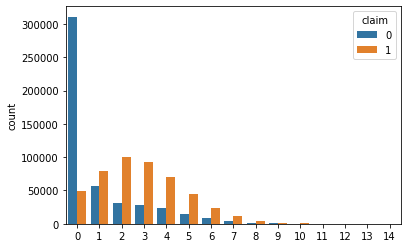

In [73]:
sns.countplot(x=train.isna().sum(axis=1), hue=y_train, data=X_train)  

In [74]:
X_train.isna().sum()

id          0
f1      15247
f2      15190
f3      15491
f4      15560
        ...  
f114    15438
f115    15559
f116    15589
f117    15407
f118    15212
Length: 119, dtype: int64

In [75]:
X_train.isna().sum().sum()

1820782

In [76]:
features = list(X_test.columns[1:])

X_train['n_missing'] = X_train[features].isna().sum(axis=1)
X_test['n_missing'] = X_test[features].isna().sum(axis=1)

X_train['std'] = X_train[features].std(axis=1)
X_test['std'] = X_test[features].std(axis=1)

X_train['mean'] = X_train[features].mean(axis=1)
X_test['mean'] = X_test[features].mean(axis=1)

X_train['kurt'] = X_train[features].kurtosis(axis=1)
X_test['kurt'] = X_test[features].kurtosis(axis=1)

features = list(X_test.columns)

In [77]:
X_train.head()

,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f113,f114,f115,f116,f117,f118,n_missing,std,mean,kurt
0,0,0.10859,0.004314,-37.566,0.017364,0.28915,-10.25100,135.12,168900.0,3.992400e+14,...,-7.11570,4378.80,1.2096,8.613400e+14,140.1,1.01770,1,1.012911e+15,1.106623e+14,114.055314
1,1,0.10090,0.299610,11822.000,0.276500,0.45970,-0.83733,1721.90,119810.0,3.874100e+15,...,4.14200,913.23,1.2464,7.575100e+15,1861.0,0.28359,0,2.945630e+15,3.881173e+14,99.411775
2,2,0.17803,-0.006980,907.270,0.272140,0.45948,0.17327,2298.00,360650.0,1.224500e+13,...,8.13120,45119.00,1.1764,3.218100e+14,3838.2,0.40690,5,3.105740e+13,3.139781e+12,101.478568
3,3,0.15236,0.007259,780.100,0.025179,0.51947,7.49140,112.51,259490.0,7.781400e+13,...,-16.33600,4952.40,1.1784,4.533000e+12,4889.1,0.51486,2,1.763090e+14,1.672354e+13,114.852006
4,4,0.11623,0.502900,-109.150,0.297910,0.34490,-0.40932,2538.90,65332.0,1.907200e+15,...,-0.43124,3856.50,1.4830,-8.991300e+12,NaN,0.23049,8,9.816106e+14,1.148054e+14,101.856248


In [78]:
imputer = SimpleImputer()

X_train = imputer.fit_transform(X_train)
X_test = imputer.fit_transform(X_test)

In [79]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = pd.DataFrame(scaler.transform(X_train), columns=features)
X_test = pd.DataFrame(scaler.transform(X_test), columns=features)

X_train.head()

,id,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f113,f114,f115,f116,f117,f118,n_missing,std,mean,kurt
0,-1.732049,0.425521,-2.354802,-0.645267,-0.872248,-0.109034,-4.832443,-1.173641,-0.607806,-0.607291,...,-0.885712,-0.641030,0.006354,-0.627602,-1.219964e+00,1.131458,-0.444420,-0.774307,-0.786094,0.726935
1,-1.732045,0.247576,-0.319490,1.218349,0.357183,1.073953,-0.363575,0.079829,-0.751072,0.892730,...,0.239124,-0.678828,0.329100,-0.527058,-6.702444e-01,-0.680399,-0.937798,-0.458325,-0.358263,0.064027
2,-1.732042,2.032347,-2.432645,-0.496795,0.336498,1.072427,0.116178,0.534916,-0.048196,-0.774348,...,0.637713,-0.196690,-0.284820,-0.635682,-3.865338e-02,-0.376057,1.529094,-0.934831,-0.951892,0.157590
3,-1.732038,1.438349,-2.334502,-0.516779,-0.835171,1.488535,3.590248,-1.191501,-0.343425,-0.746043,...,-1.806977,-0.634774,-0.267279,-0.640434,2.970430e-01,-0.109601,0.048959,-0.911083,-0.930947,0.763001
4,-1.732035,0.602308,1.081674,-0.656516,0.458759,0.277665,-0.160390,0.725214,-0.910062,0.043663,...,-0.217821,-0.646727,2.404151,-0.640636,2.905263e-16,-0.811455,3.009229,-0.779424,-0.779706,0.174688


In [80]:
model = LogisticRegressionCV()
model.fit(X_train, y_train)

LogisticRegressionCV()

In [81]:
pred = model.predict_proba(X_test)[:,1]
pred

array([0.3930421 , 0.20517341, 0.37094719, ..., 0.8501479 , 0.21915003,
       0.90730039])

In [82]:
submission = pd.DataFrame(
    {'id': pd.read_csv('../input/tabular-playground-series-sep-2021/test.csv')['id'], 
     'claim': pd.Series(pred)}
)
submission.to_csv('submission.csv', index=0)

In [83]:
submission

,id,claim
0,957919,0.393042
1,957920,0.205173
2,957921,0.370947
3,957922,0.258310
4,957923,0.287313
...,...,...
493469,1451388,0.571569
493470,1451389,0.213789
493471,1451390,0.850148
493472,1451391,0.219150
